# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | novotroitsk
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | saskatoon
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | kudahuvadhoo
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | yaren
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | nuku'alofa
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,18.94,67,0,4.47,US,1699923258
1,novotroitsk,51.2030,58.3266,4.39,69,100,5.17,RU,1699923480
2,grytviken,-54.2811,-36.5092,2.29,98,100,3.44,GS,1699923481
3,alice springs,-23.7000,133.8833,32.75,15,4,3.60,AU,1699923446
4,atafu village,-8.5421,-172.5159,28.29,81,100,5.58,TK,1699923481


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,18.94,67,0,4.47,US,1699923258
1,novotroitsk,51.2030,58.3266,4.39,69,100,5.17,RU,1699923480
2,grytviken,-54.2811,-36.5092,2.29,98,100,3.44,GS,1699923481
3,alice springs,-23.7000,133.8833,32.75,15,4,3.60,AU,1699923446
4,atafu village,-8.5421,-172.5159,28.29,81,100,5.58,TK,1699923481


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

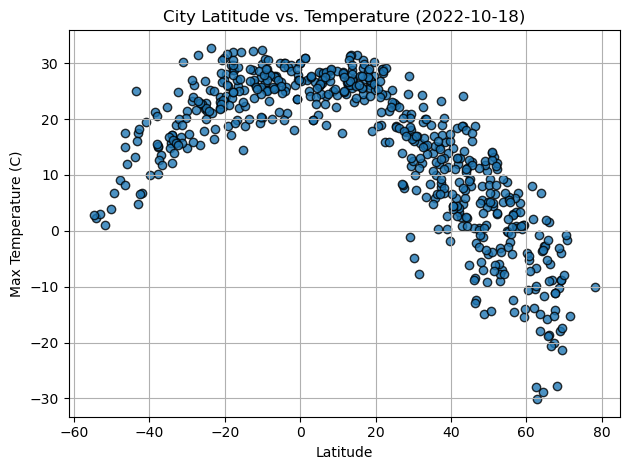

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (2022-10-18)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

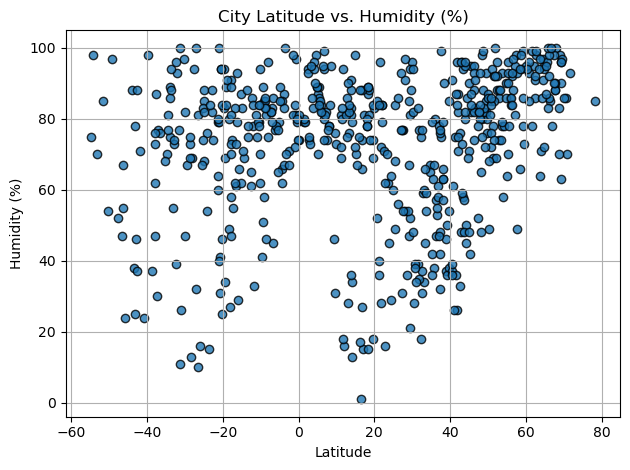

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%)")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

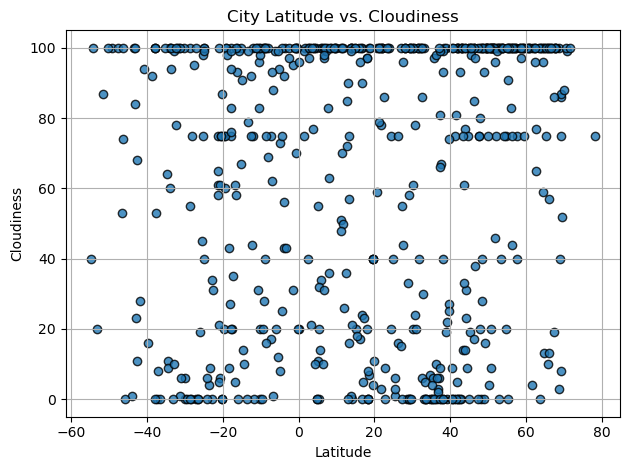

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

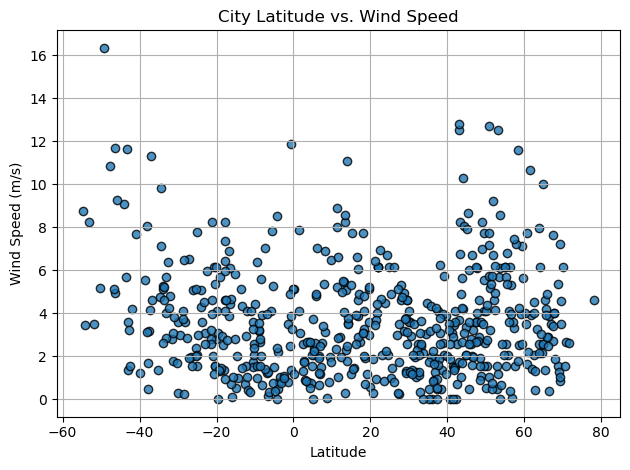

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,18.94,67,0,4.47,US,1699923258
1,novotroitsk,51.2030,58.3266,4.39,69,100,5.17,RU,1699923480
6,utrik,11.2278,169.8474,28.16,81,100,7.99,MH,1699923481
9,qaqortoq,60.7167,-46.0333,-5.14,93,100,1.62,GL,1699923389
10,iqaluit,63.7506,-68.5145,-17.95,64,0,2.57,CA,1699923352


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,18.94,67,0,4.47,US,1699923258
1,novotroitsk,51.2030,58.3266,4.39,69,100,5.17,RU,1699923480
6,utrik,11.2278,169.8474,28.16,81,100,7.99,MH,1699923481
9,qaqortoq,60.7167,-46.0333,-5.14,93,100,1.62,GL,1699923389
10,iqaluit,63.7506,-68.5145,-17.95,64,0,2.57,CA,1699923352


###  Temperature vs. Latitude Linear Regression Plot

The linear regression is -0.8700977191880265


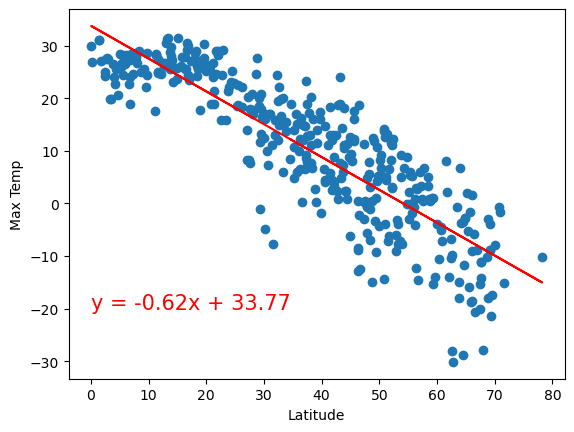

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The linear regression is {rvalue}')

The linear regression is -0.8700977191880265


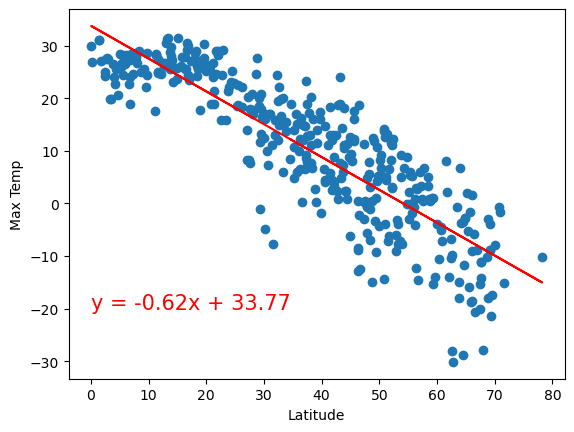

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The linear regression is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The regression is 0.2401732056937334


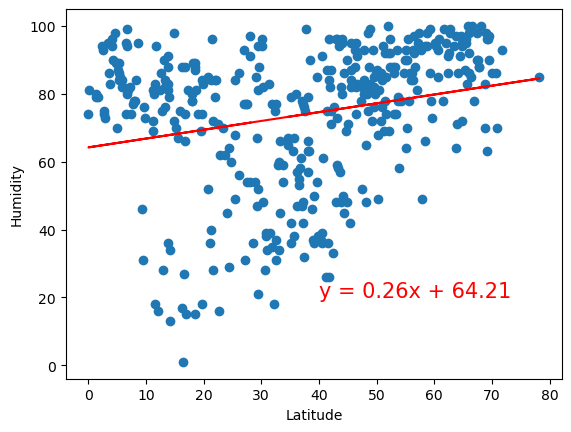

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The regression is {rvalue}')

The regression is 0.2401732056937334


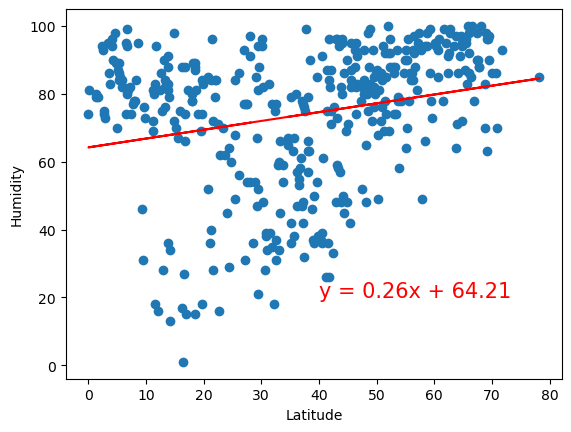

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The regression is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The regression is 0.16458043659507057


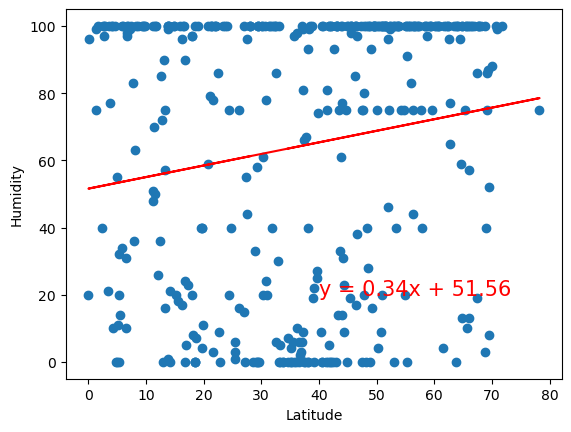

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The regression is {rvalue}')

The regression is 0.16458043659507057


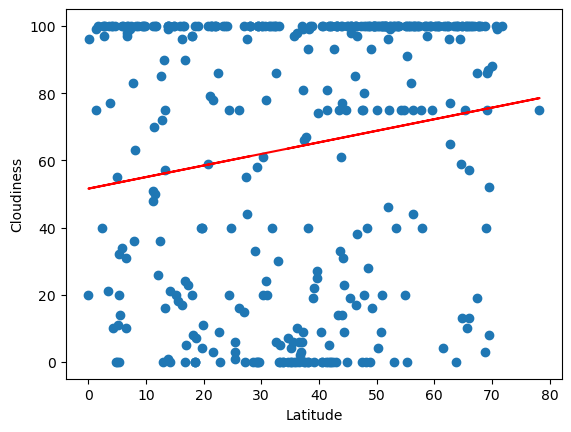

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The regression is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The regression is 0.10803886461036141


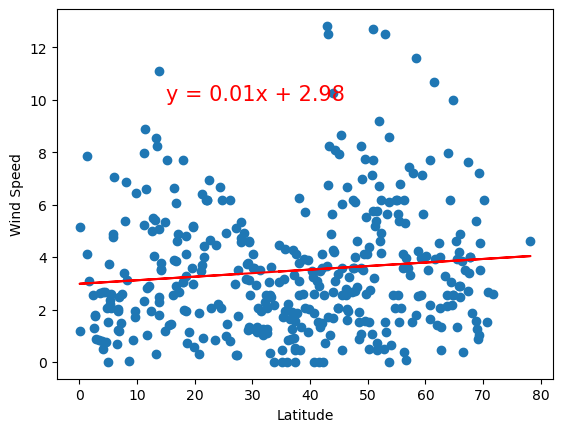

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The regression is {rvalue}')

The regression is 0.10803886461036141


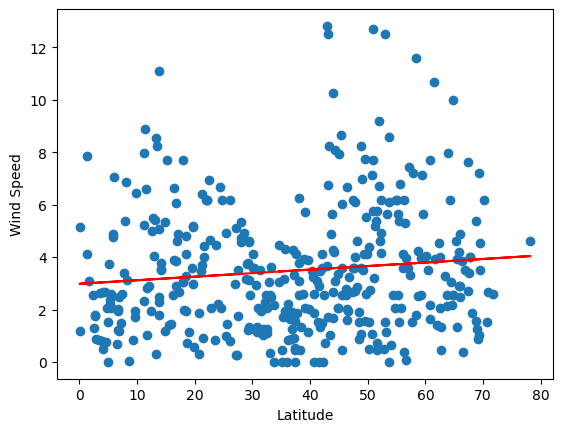

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The regression is {rvalue}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE